In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import shutil
import PIL
from tensorflow.keras.preprocessing.image import ImageDataGenerator 

In [3]:
# import zipfile

# with zipfile.ZipFile("/content/drive/MyDrive/Collab/AP Project/Food Classification.zip","r") as zip_ref:
#     zip_ref.extractall("/content/drive/MyDrive/Collab/AP Project/")

In [ ]:
# sets = ['test','train','val']

# uniqueDimensions = []

# for i in sets:
#     currentSet = os.path.join(path,i)
#     for j in os.listdir(currentSet):
#         currentClass = os.path.join(currentSet,j)
#         for k in os.listdir(currentClass):
#             image = PIL.Image.open(os.path.join(currentClass,k))
#             if image.size not in uniqueDimensions:
#                 uniqueDimensions.append(image.size)

In [ ]:
# uniqueDimensions

[(100, 100),
 (183, 275),
 (275, 183),
 (259, 194),
 (250, 202),
 (294, 171),
 (266, 189),
 (299, 168),
 (306, 165),
 (300, 168),
 (286, 176),
 (225, 225),
 (201, 251),
 (194, 260),
 (188, 268),
 (194, 259),
 (227, 222),
 (192, 263),
 (215, 234),
 (348, 145),
 (282, 179),
 (197, 256),
 (290, 174),
 (262, 192),
 (271, 186),
 (191, 263),
 (251, 201),
 (246, 205),
 (195, 259),
 (239, 211),
 (267, 189),
 (260, 194),
 (182, 276),
 (207, 244),
 (295, 171),
 (233, 216),
 (224, 224),
 (285, 177),
 (261, 193),
 (274, 184),
 (284, 177),
 (299, 169),
 (177, 284),
 (183, 276),
 (184, 274),
 (301, 167),
 (224, 225),
 (275, 184),
 (263, 192),
 (228, 221),
 (276, 183),
 (180, 279),
 (212, 237),
 (202, 250),
 (165, 306),
 (270, 187),
 (189, 267),
 (243, 182),
 (241, 209),
 (185, 273),
 (202, 249),
 (204, 247),
 (266, 190),
 (325, 155),
 (242, 208),
 (168, 300),
 (318, 159),
 (253, 199),
 (238, 212),
 (310, 163),
 (249, 202),
 (292, 173),
 (222, 227),
 (305, 165),
 (256, 154),
 (212, 238),
 (209, 241),

In [3]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Collab/AP Project/train',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

val_datagen = ImageDataGenerator(rescale = 1./255,
                               shear_range = 0.2,
                               zoom_range = 0.2,
                               horizontal_flip = True)

val_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Collab/AP Project/val',
                                         target_size = (64, 64),
                                         batch_size = 32,
                                         class_mode = 'categorical')

test_datagen = ImageDataGenerator(rescale = 1./255)

test_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Collab/AP Project/test',
                                         target_size = (64, 64),
                                         batch_size = 32,
                                         class_mode = 'categorical')

Found 3060 images belonging to 20 classes.
Found 0 images belonging to 0 classes.
Found 585 images belonging to 20 classes.


In [4]:
import tensorflow as tf
from tensorflow.keras.callbacks import History

hist = History()

cnn = tf.keras.models.Sequential()

cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

cnn.add(tf.keras.layers.Flatten())

cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

cnn.add(tf.keras.layers.Dense(units=20, activation='softmax'))

cnn.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [6]:
#cnn.fit(x = training_set, validation_data = val_set, epochs = 25, callbacks=[hist])

cnn.fit(training_set, steps_per_epoch=124, epochs = 20, validation_data = val_set, validation_steps = 20, callbacks=[hist]);

Epoch 1/20
 66/124 [==============>...............] - ETA: 9:38 - loss: 2.5737 - accuracy: 0.1449

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 12 bytes but only got 10. 
  warnings.warn(str(msg))


 75/124 [=================>............] - ETA: 8:03 - loss: 2.5364 - accuracy: 0.1600

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


124/124 [==============================] - 926s 7s/step - loss: 2.4948 - accuracy: 0.1725


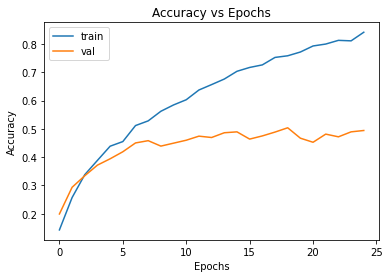

In [ ]:
import matplotlib.pyplot as plt
#using hist for accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train', 'val'])
plt.show()

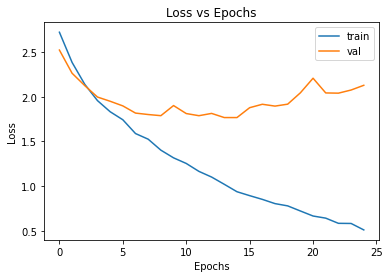

In [ ]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['train', 'val'])
plt.show()

In [ ]:
cnn.evaluate(training_set)

<ipython-input-75-8825d4c30d01>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  cnn.evaluate_generator(training_set)


[0.45597609877586365, 0.8511066436767578]

In [ ]:
cnn.evaluate(test_set)

19/19 [==============================] - 1s 49ms/step - loss: 2.1159 - accuracy: 0.5179


[2.115873336791992, 0.5179487466812134]